In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Coefficient (slope):  [[1.95795668]]
Intercept:  [3.14810072]
Predicated value:  [[4.12707906]]


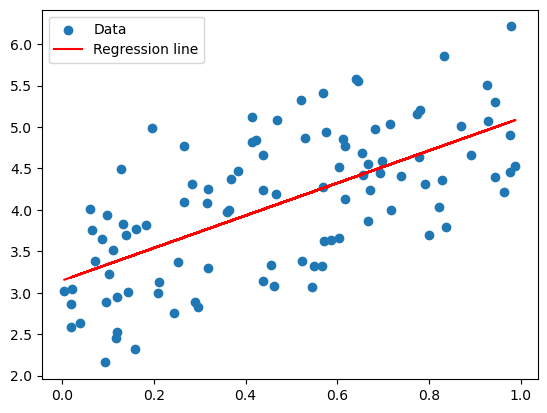

In [2]:
# generate random data 
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3+2*X+np.random.randn(100, 1) / 1.5

# create and train the model 
model = LinearRegression()
model.fit(X, y)

# get the coefficients
print('Coefficient (slope): ', model.coef_)
print('Intercept: ', model.intercept_)

# Predict 
X_new = np.array([[0.5]])
y_pred = model.predict(X_new)
print('Predicated value: ', y_pred)

# Plot the data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color = 'red', label='Regression line')
plt.legend() 
plt.show()


In [3]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\DataScience\Python\Student-Performance-csv_y56IU.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
# convert char into numerical value 
categorical_column = df['Extracurricular Activities']
categorical_column

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 10000, dtype: object

In [7]:
# convert char into int 
le = LabelEncoder()
le.fit_transform(categorical_column)

array([1, 0, 1, ..., 1, 1, 0])

In [8]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [9]:
df['Extracurricular Activities'] = le.fit_transform(categorical_column)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [10]:
x = df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [11]:
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [13]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1332,1,52,0,9,7
8451,9,85,1,4,5
3023,5,42,1,7,8
6261,5,62,0,6,1
2607,2,65,0,9,9
...,...,...,...,...,...
5637,5,64,1,4,0
6797,7,64,1,8,6
573,1,82,0,5,8
647,8,76,0,8,8


In [14]:
# z = (data - mean) / sd
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [15]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred=model.predict(x_test_scaled)

In [17]:
mean_squared_error(y_test, y_pred)

4.235524557647117

In [19]:
# creating physical file 
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump((model, scaler, le), file)
